<a href="https://colab.research.google.com/github/raulbenitez/introAI_ICE/blob/main/Tema5_validaci%C3%B3_de_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema 5. Tècniques d’entrenament i validació de models predictius 

5.1 Procediment general

5.2 Mesures de rendiment

5.3 Validació creuada amb k-particions (k-fold cross-validation)


## 5.1 Procediment general

Validation using training data: Wrong! 

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
y_pred = model.predict(X)
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

1.0

We should split data in training & test subsets, training with the train subset and validate using test: 

In [ ]:
from sklearn.model_selection import train_test_split
# split the data with 70% in each set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0,
                                  train_size=0.7)
# fit the model on one set of data
model.fit(Xtrain, ytrain)

# evaluate the model on the second set of data
ytest_pred = model.predict(Xtest)
accuracy_score(ytest, ytest_pred)

0.9777777777777777

## 5.2 Mesures de rendiment 

https://en.wikipedia.org/wiki/Sensitivity_and_specificity

In a binary classification problem (two-classes ), we define the following quantities:

- True positive (TP): Number of class 1 observations of that have been correctly predicted as class 1.
- True negative (TN): Number of class 0 observations of that have been correctly predicted as class 0.
- False positive (FP): Number of class 0 observations of that have been uncorrectly predicted as class 1 (false alarm, Type I error).
- False negative (FN): Number of class 1 observations of that have been uncorrectly predicted as class 0 (omission, Type II error)

From them we can define different measures of error: 

- Sensitivity, recall, hit rate, or true positive rate (TPR):

$\text{TPR} =\frac{TP}{TP+FN}$

- Specificity, selectivity or true negative rate (TNR):

$\text{TNR} =\frac{TN}{TN+FP}$

- F1 score: The harmonic mean of precision and sensitivity:

$\text{F1}={\frac {2TP}{2TP+FP+FN}}$.

### La matriu de confusió

A la matriu de confusió $C_{i,j}$ és igual al nombre d'ob
servacions que se sap que estan al grup $i$ i que es preveu que estiguin al grup $j$. A la implementació de sklearn, les files corresponen a les etiquetes de classe reals i les columnes a les etiquetes de classe previstes.

Així, en la classificació binària, el recompte de vertaders negatius és $C_{0,0}$, els falsos negatius és $C_{1,0}$, els vertaders positius és $C_{1,1}$ i els falsos positius és $C_{ 0,1}$.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, ytest_pred)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

Description of the available performance scores in sklearn libraries:
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

### Multi-class scores

In [ ]:
CM = confusion_matrix(ytest, ytest_pred)
c00,c01,c02,c10,c11,c12,c20,c21,c22 = CM.ravel()

In [ ]:
print('Class names: {}'.format(list(iris.target_names)))
c_s_s,c_s_ve,c_s_vi,c_ve_s,c_ve_ve,c_ve_vi,c_vi_s,c_vi_ve,c_vi_vi = CM.ravel()

Class names: ['setosa', 'versicolor', 'virginica']


**Precision for each class:**

Number of correclty predicted observations of the class out of the total number of predictions of that class.

For instance, precision for the setosa class (class 0) is the number of correctly predicted setosa flowers out of all setosa predicted flowers:


In [ ]:
precision_setosa = c_s_s/(c_s_s+c_ve_s+c_vi_s)
precision_versicolor = c_ve_ve/(c_s_ve+c_ve_ve+c_vi_ve)
precision_virginica = c_vi_vi/(c_s_vi+c_ve_vi+c_vi_vi)

print('Precisions: Setosa {} , Versicolor {} , Virginica {}'.format(precision_setosa,precision_versicolor,precision_virginica))

Precisions: Setosa 1.0 , Versicolor 1.0 , Virginica 0.9166666666666666


**Recall for each class:** 

Number of correclty predicted observations of the class out of the total number of actual observations of that class.

For instance, recall for the setosa class (class 0) is the number of correctly predicted setosa flowers out of all setosa flowers:

In [ ]:
recall_setosa = c_s_s/(c_s_s+c_s_ve+c_s_vi)
recall_versicolor = c_ve_ve/(c_ve_s+c_ve_ve+c_ve_vi)
recall_virginica = c_vi_vi/(c_vi_s+c_vi_ve+c_vi_vi)
print('Recall: Setosa {} , Versicolor {} , Virginica {}'.format(recall_setosa,recall_versicolor,recall_virginica))

Recall: Setosa 1.0 , Versicolor 0.9444444444444444 , Virginica 1.0


### Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ytest_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## 5.3 Validació creuada amb k-particions (k-fold Cross-validation)

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

https://en.wikipedia.org/wiki/Cross-validation_(statistics)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, iris.data, iris.target, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.05)


In [ ]:
scores

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

You can specify the performance score to be estimated using the k-fold cross-validation procedure:

In [ ]:
from sklearn import metrics
f1_scores = cross_val_score(model,X,y, cv=5, scoring='f1_macro')
print("Accuracy: %0.2f (+/- %0.2f)" % (f1_scores.mean(), f1_scores.std() * 2))

Accuracy: 0.96 (+/- 0.05)


Multiple scores can be evaluated simultaneously:

In [ ]:
from sklearn.model_selection import cross_validate
scores = ['precision_macro', 'recall_macro']
multiple_scores = cross_validate(model,X,y, cv=5, scoring=scores)
multiple_scores

{'fit_time': array([0.00094247, 0.00115395, 0.00064945, 0.00067616, 0.00060272]),
 'score_time': array([0.01096749, 0.00405693, 0.00444436, 0.0033977 , 0.00341511]),
 'test_precision_macro': array([0.96969697, 0.96969697, 0.94444444, 0.93333333, 1.        ]),
 'test_recall_macro': array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])}

k-fold cross-validation:

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)


TRAIN: [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 1

In [ ]:
kf1 = KFold(n_splits=5)
cross_val_score(model, X, y, cv=kf1,scoring='accuracy')

array([1.        , 1.        , 0.86666667, 0.93333333, 0.83333333])

Custom performance metrics

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
def tn(y, y_pred): return confusion_matrix(y, y_pred)[0, 0]
def fp(y, y_pred): return confusion_matrix(y, y_pred)[0, 1]
def fn(y, y_pred): return confusion_matrix(y, y_pred)[1, 0]
def tp(y, y_pred): return confusion_matrix(y, y_pred)[1, 1]
tn_score = make_scorer(tn)
fp_score = make_scorer(fp)
fn_score = make_scorer(fn)
tp_score = make_scorer(tp)

In [ ]:
[tn(ytest,ytest_pred)
,fp(ytest,ytest_pred)
,fn(ytest,ytest_pred)
,tp(ytest,ytest_pred)]

[16, 0, 0, 17]

In [ ]:
tp_score(model,X,y)

49

Multiple performance measures

In [ ]:
from sklearn.model_selection import cross_validate
custom_scores = {'tp': tp_score, 'tn': tn_score,'fp': fp_score, 'fn': fn_score}
cv_results = cross_validate(model,X,y,cv=10,scoring=custom_scores,return_train_score=True)

cv_results

{'fit_time': array([0.0011375 , 0.00107956, 0.00105357, 0.0009861 , 0.00095797,
        0.00097036, 0.00100994, 0.00096393, 0.00095773, 0.00097156]),
 'score_time': array([0.01284957, 0.00496888, 0.00488353, 0.00483608, 0.004704  ,
        0.00473332, 0.00504708, 0.00444436, 0.00485921, 0.00488853]),
 'test_tp': array([5, 5, 5, 5, 3, 5, 4, 5, 5, 5]),
 'train_tp': array([45, 45, 45, 45, 45, 45, 45, 45, 45, 45]),
 'test_tn': array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5]),
 'train_tn': array([45, 45, 45, 45, 45, 45, 45, 45, 45, 45]),
 'test_fp': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'train_fp': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'test_fn': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'train_fn': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}

### Ajustar paràmetres del model (GridSearch Cross-Validation)

Optimal model parameters by performing a grid search optimization

In [ ]:
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.2,random_state=42)

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10,100],'gamma':[0.001,0.01,0.1,1]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
clf.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Now using a decision tree classifier

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
from sklearn import svm, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()

X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.2,random_state=42)

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_estimator_

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    1.0s finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

## Exemple 1: Comparació de classificadors

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

Automatically created module for IPython interactive environment


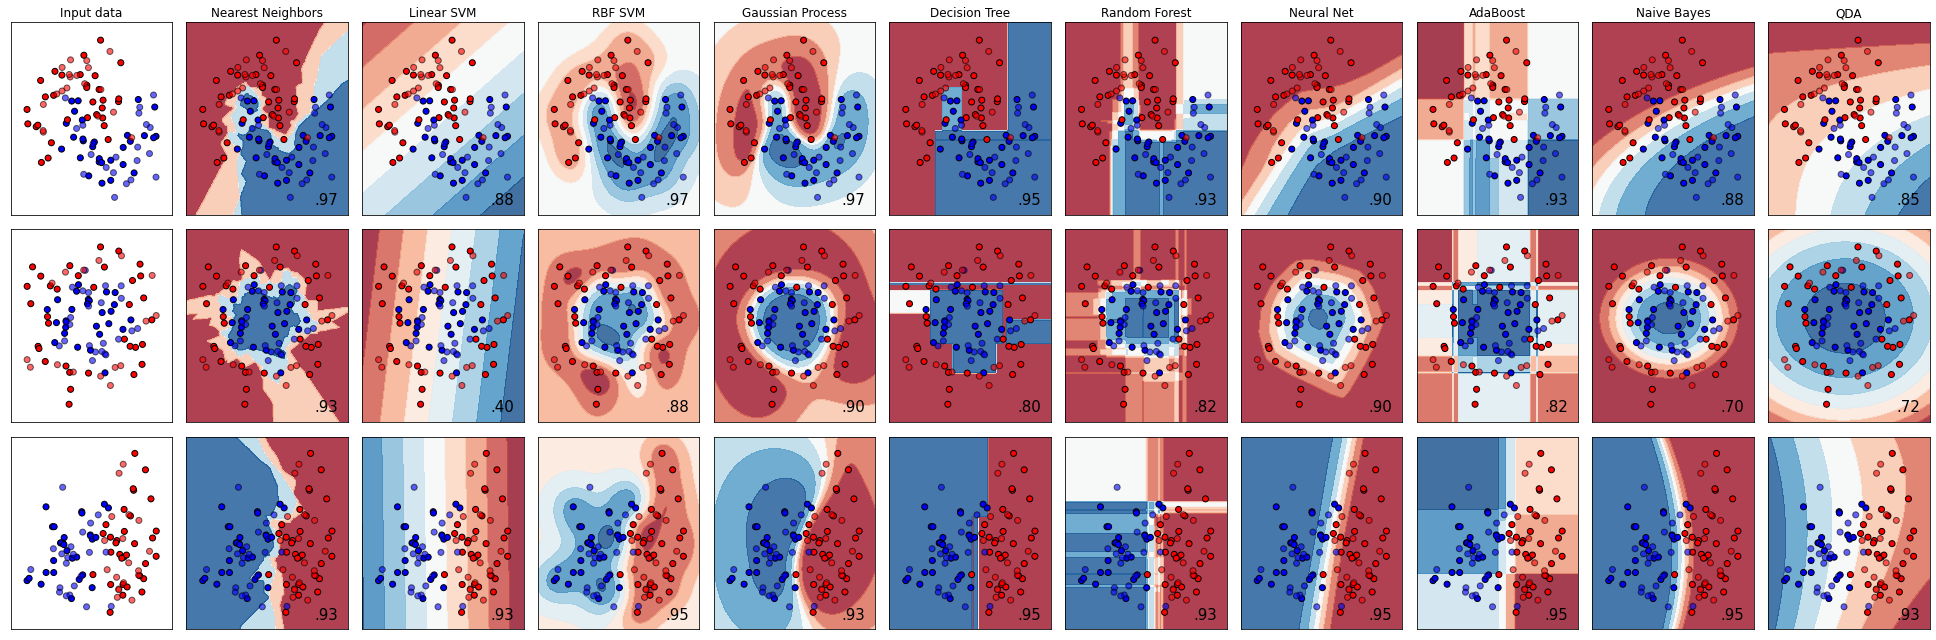

In [ ]:
print(__doc__)

# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

## Exemple 2: Quantificació d'un algorisme supervisat de segmentació d'imatges

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


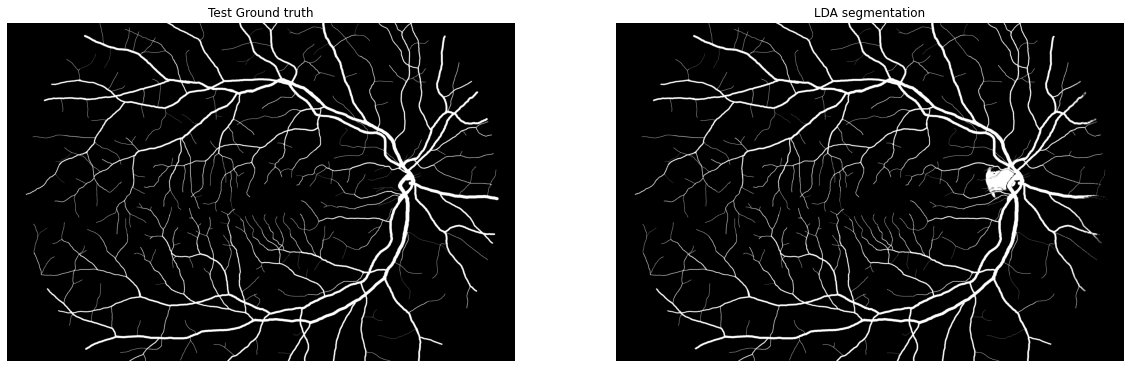

In [ ]:
import skimage as sk 
import matplotlib.pyplot as plt
from skimage import io
import os 
from matplotlib import gridspec

I_train = sk.io.imread('vessels_train.jpg') 
I_train_GT = sk.io.imread('vessels_train_GT.tif') 
I_test = sk.io.imread('vessels_test.jpg')
I_test_GT = sk.io.imread('vessels_test_GT.tif')

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
v_I_test = I_test.reshape(I_test.shape[0]*I_test.shape[1],1).astype(np.uint8) # reshape image as 1d array
v_I_train = I_train.reshape(I_train.shape[0]*I_train.shape[1],1).astype(np.uint8) 
v_train_GT = I_train_GT.reshape(I_train_GT.shape[0]*I_train_GT.shape[1],1).astype(np.bool) 

lda_model = LinearDiscriminantAnalysis(n_components=2,store_covariance=True)
lda_model.fit(v_I_train, v_train_GT.ravel()) # Train with training image and training Ground Truth

# Predict the test image:
v_lda = lda_model.predict(v_I_test)
I_lda = np.array(v_lda).reshape(I_test.shape[0],I_test.shape[1]).astype(np.uint8) # Shape back result as image 

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(20, 20))

ax[0].imshow(I_test_GT, cmap=plt.cm.gray)
ax[0].set_title('Test Ground truth')
ax[0].set_axis_off()

ax[1].imshow(I_lda, cmap=plt.cm.gray)
ax[1].set_title('LDA segmentation')
ax[1].set_axis_off()

plt.show()


In order to evaluate a segmentation algorithm, we should introduce the following quantities:

- True positive (TP): A vessel pixel that has been correctly segmented as vessel
- True negative (TN): A background pixel that has been correctly segmented as background
- False positive (FP): A background pixel that has been mistakenly segmented as vessel (false alarm, Type I error)
- False negative (FN): A vessel pixel that has been mistakenly segmented as background (omission, Type II error)


In [ ]:
from sklearn.metrics import confusion_matrix

v_test_GT = I_test_GT.reshape(I_test_GT.shape[0]*I_test_GT.shape[1],1).astype(np.bool) 

CM_lda = confusion_matrix(v_test_GT,np.array(v_lda).astype(np.bool))
tn, fp, fn, tp = CM_lda.ravel()
TPR_lda = tp/(tp+fn)
FPR_lda = fp/(fp+tn)
DSC_lda = 2*tp/(2*tp+fp+fn)

print('LDA Segmentation: TPR={}, FPR={}, DSC={}'.format(TPR_lda,FPR_lda,DSC_lda))

LDA Segmentation: TPR=0.9831237035089258, FPR=0.003014646271029858, DSC=0.970905651428659


Compare performance aginest a QDA:

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

v_train_GT = I_train_GT.reshape(I_train_GT.shape[0]*I_train_GT.shape[1],1).astype(np.bool) 

qda_model = QuadraticDiscriminantAnalysis(store_covariance=True)
qda_model.fit(v_I_train, v_train_GT.ravel()) # Train with training image and training Ground Truth

# Predict the test image:
v_qda = lda_model.predict(v_I_test)
I_qda = np.array(v_qda).reshape(I_test.shape[0],I_test.shape[1]).astype(np.uint8) # Shape back result as image 

CM_qda = confusion_matrix(v_test_GT,np.array(v_qda).astype(np.bool))
tn, fp, fn, tp = CM_qda.ravel()
TPR_qda = tp/(tp+fn)
FPR_qda = fp/(fp+tn)
DSC_qda = 2*tp/(2*tp+fp+fn)
print('QDA Segmentation: TPR={}, FPR={}, DSC={}'.format(TPR_qda,FPR_qda,DSC_qda))

QDA Segmentation: TPR=0.9831237035089258, FPR=0.003014646271029858, DSC=0.970905651428659
